In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [44]:
# Load the dataset
df = pd.read_csv(r"C:\Users\godbl\Downloads\2) Stock Prices Data Set.csv")

# Preview data
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [45]:
# Dataset structure
df.info()

# Check missing values
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497472 entries, 0 to 497471
Data columns (total 7 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   symbol  497472 non-null  object 
 1   date    497472 non-null  object 
 2   open    497461 non-null  float64
 3   high    497464 non-null  float64
 4   low     497464 non-null  float64
 5   close   497472 non-null  float64
 6   volume  497472 non-null  int64  
dtypes: float64(4), int64(1), object(2)
memory usage: 26.6+ MB


symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [46]:
# Mean
mean_values = df.mean(numeric_only=True)

# Median
median_values = df.median(numeric_only=True)

# Mode
mode_values = df.mode().iloc[0]

# Standard deviation
std_values = df.std(numeric_only=True)

print(mean_values)
print(median_values)
print(mode_values)
print(std_values)

open      8.635227e+01
high      8.713256e+01
low       8.555247e+01
close     8.636908e+01
volume    4.253611e+06
dtype: float64
open      6.497000e+01
high      6.556000e+01
low       6.435370e+01
close     6.498000e+01
volume    2.084896e+06
dtype: float64
symbol             A
date      2017-12-05
open            70.0
high            72.0
low             77.0
close           34.5
volume     1241019.0
Name: 0, dtype: object
open      1.014712e+02
high      1.023121e+02
low       1.005710e+02
close     1.014724e+02
volume    8.232139e+06
dtype: float64


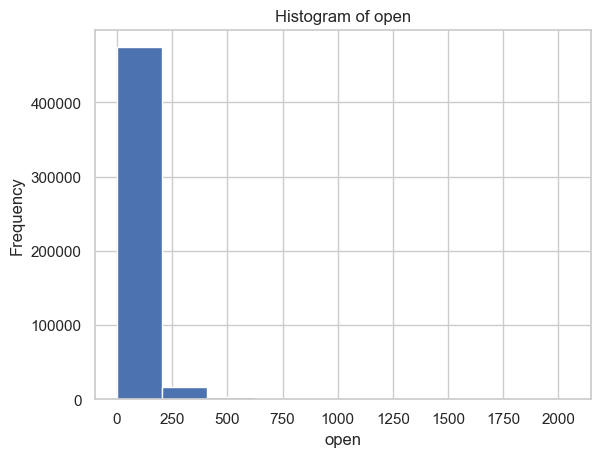

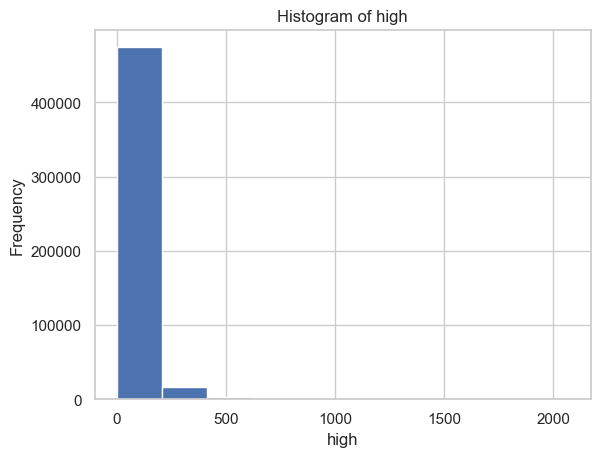

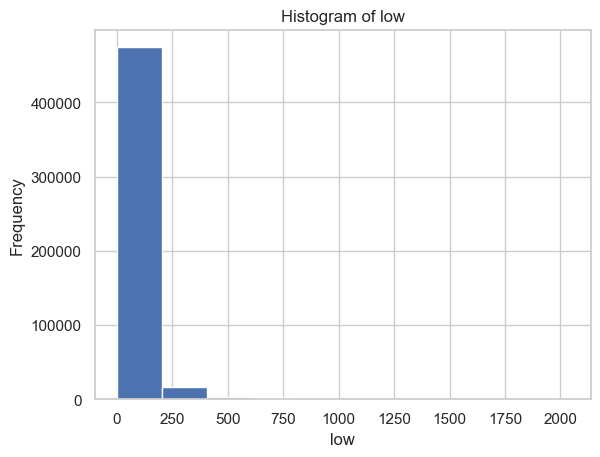

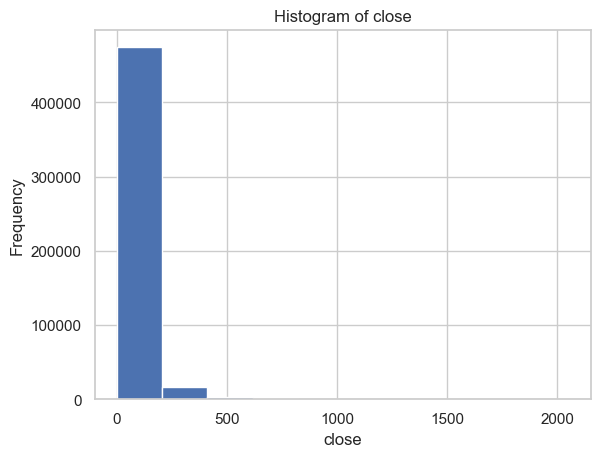

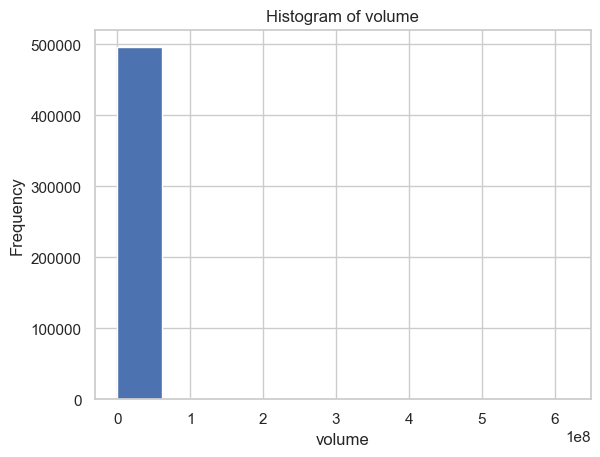

In [47]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure()
    df[col].hist()
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

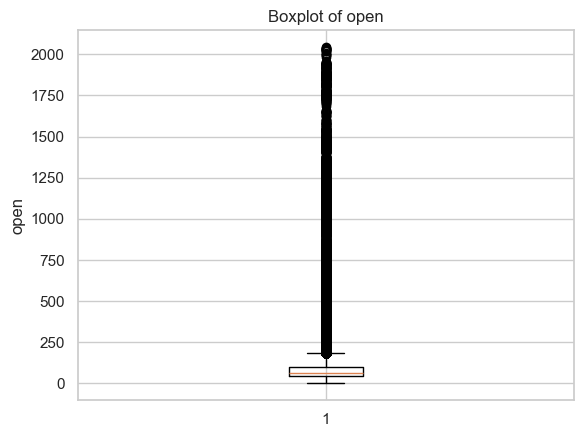

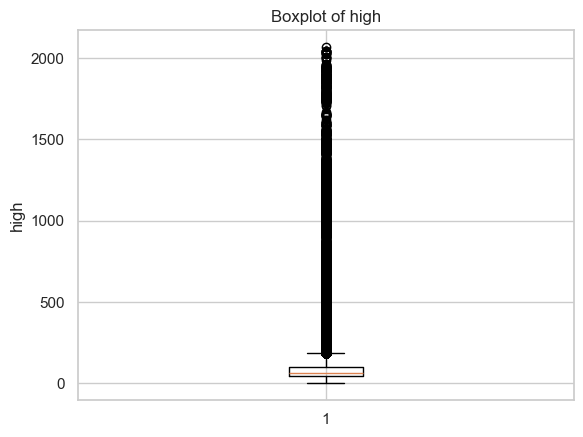

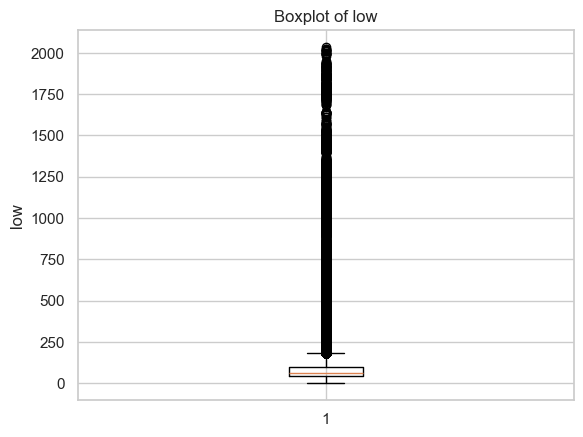

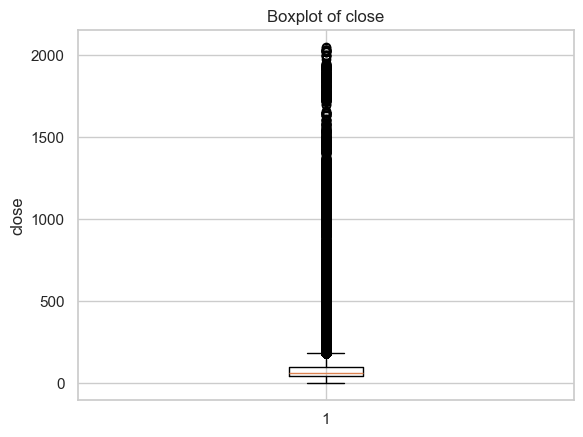

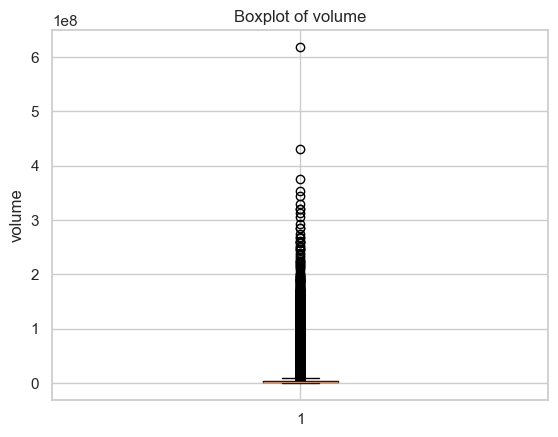

In [48]:
for col in numeric_cols:
    plt.figure()
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.show()

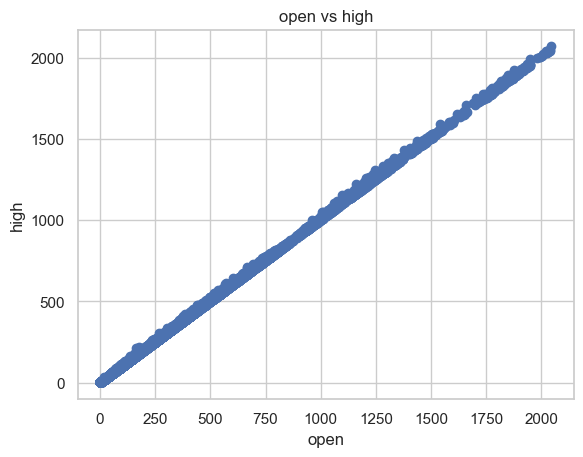

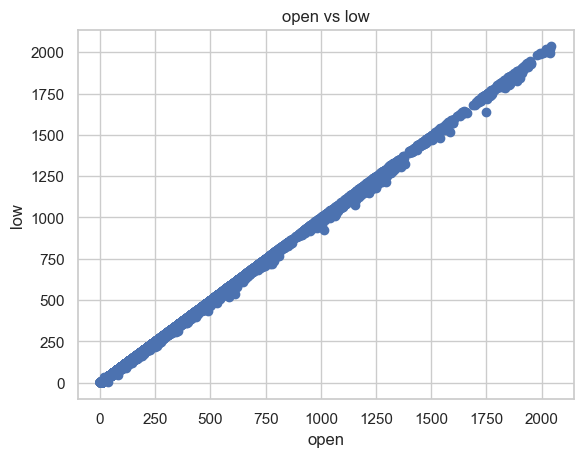

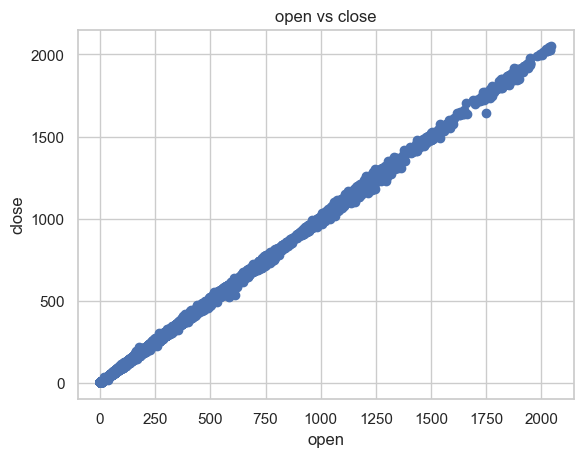

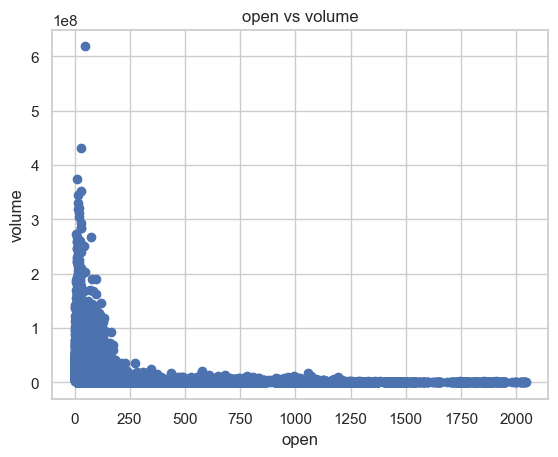

In [49]:
base_col = "open"

for col in ["high", "low", "close", "volume"]:
    plt.figure()
    plt.scatter(df[base_col], df[col])
    plt.xlabel(base_col)
    plt.ylabel(col)
    plt.title(f"{base_col} vs {col}")
    plt.show()

In [50]:
correlation_matrix = df.corr(numeric_only=True)
print(correlation_matrix)

            open      high       low     close    volume
open    1.000000  0.999941  0.999928  0.999876 -0.148724
high    0.999941  1.000000  0.999905  0.999938 -0.148344
low     0.999928  0.999905  1.000000  0.999941 -0.149284
close   0.999876  0.999938  0.999941  1.000000 -0.148839
volume -0.148724 -0.148344 -0.149284 -0.148839  1.000000


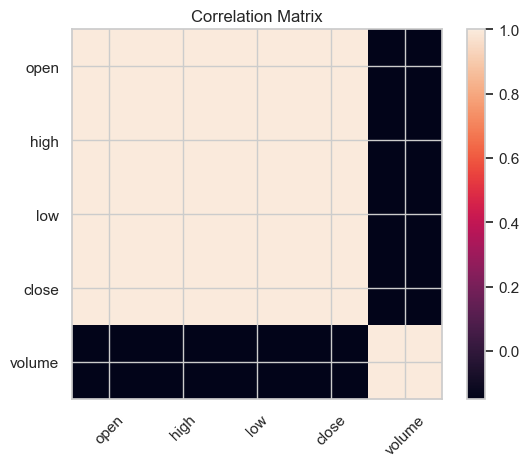

In [51]:
plt.figure()
plt.imshow(correlation_matrix)
plt.colorbar()
plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)
plt.title("Correlation Matrix")
plt.show()

In [52]:
sns.set_theme(style="whitegrid")

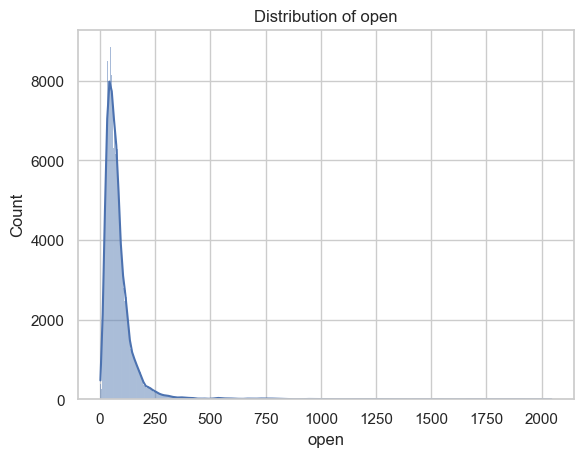

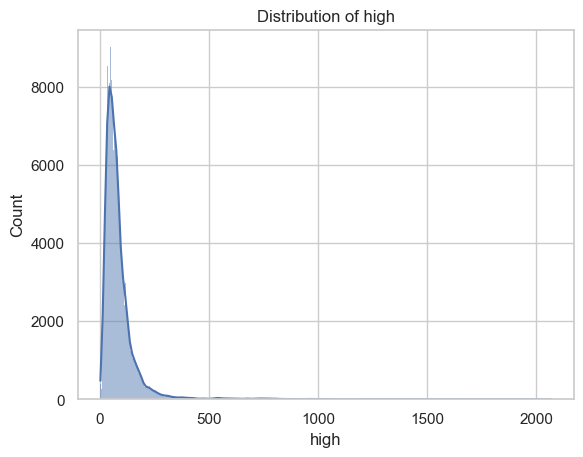

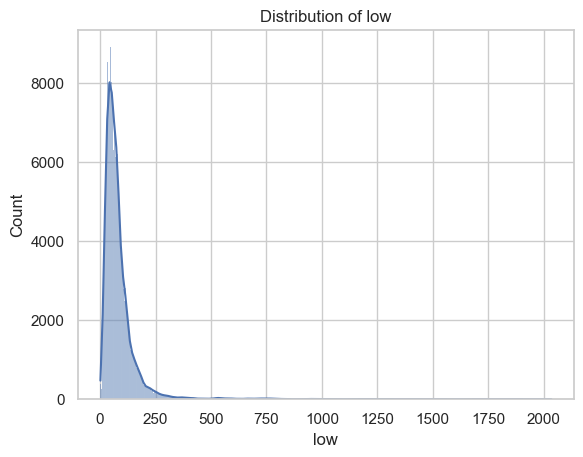

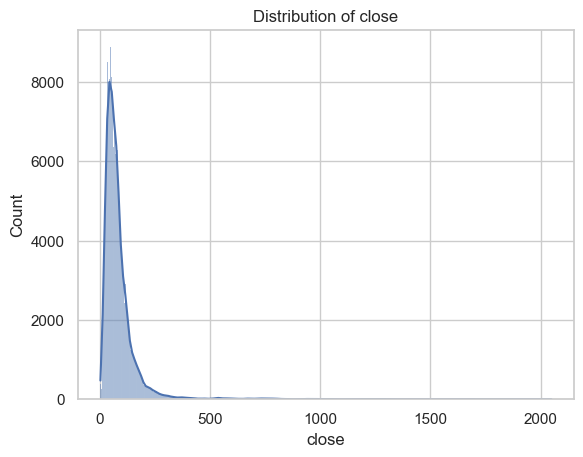

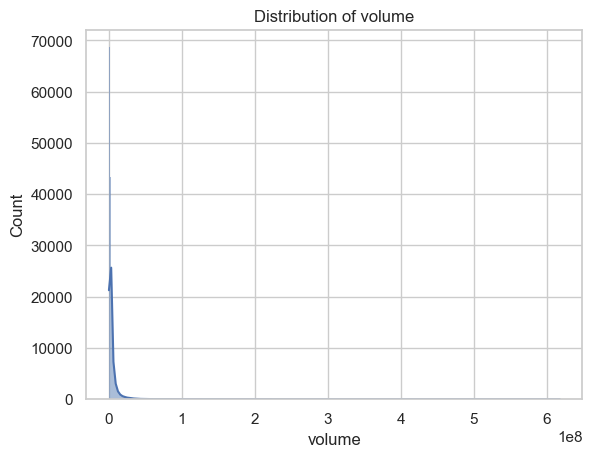

In [53]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure()
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

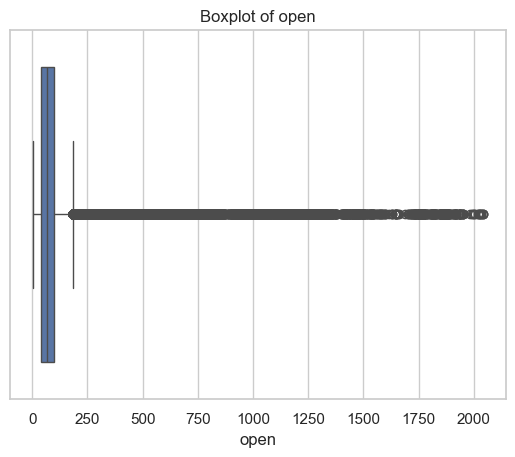

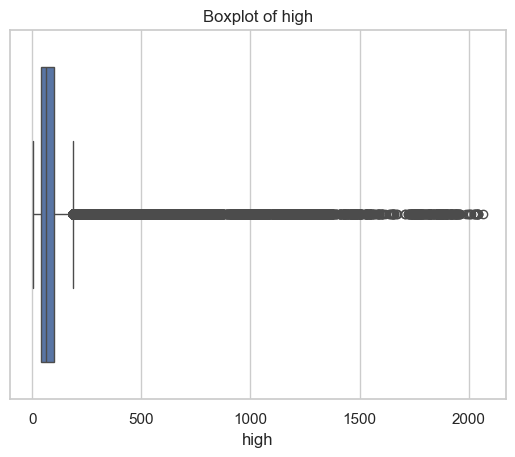

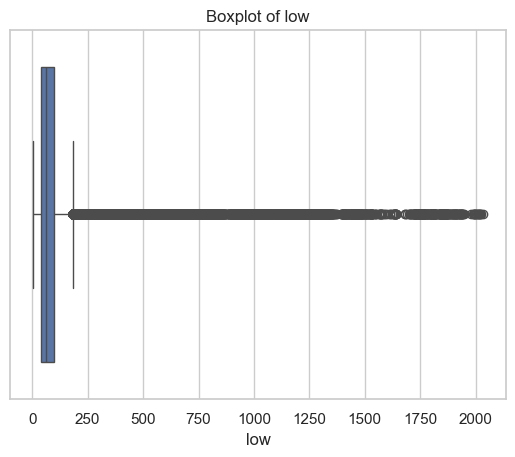

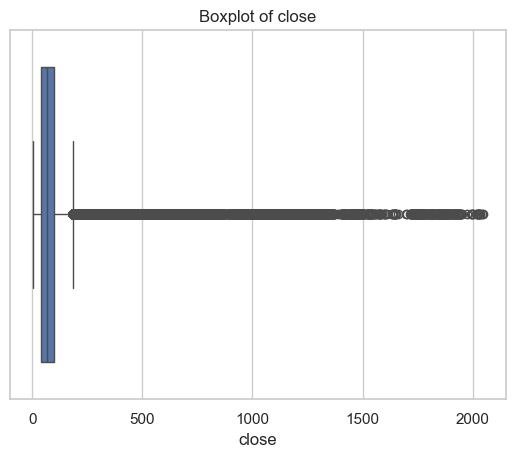

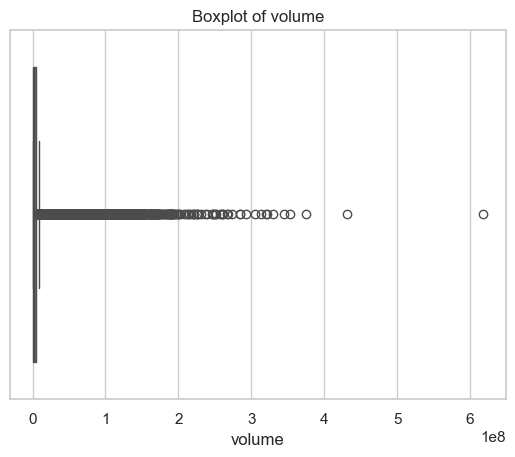

In [54]:
for col in numeric_cols:
    plt.figure()
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot of {col}")
    plt.show()

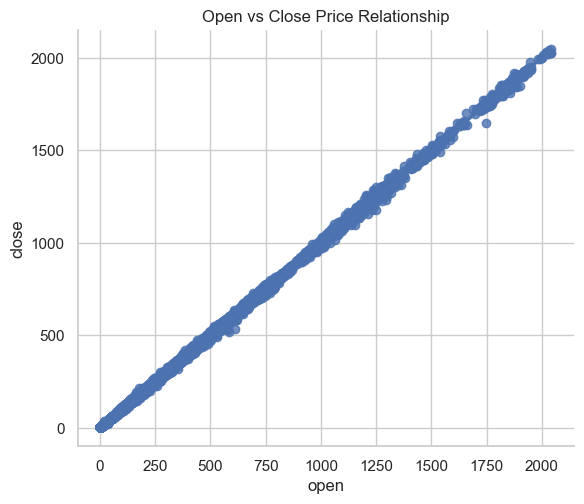

In [55]:
sns.lmplot(x="open", y="close", data=df, height=5, aspect=1.2)
plt.title("Open vs Close Price Relationship")
plt.show()

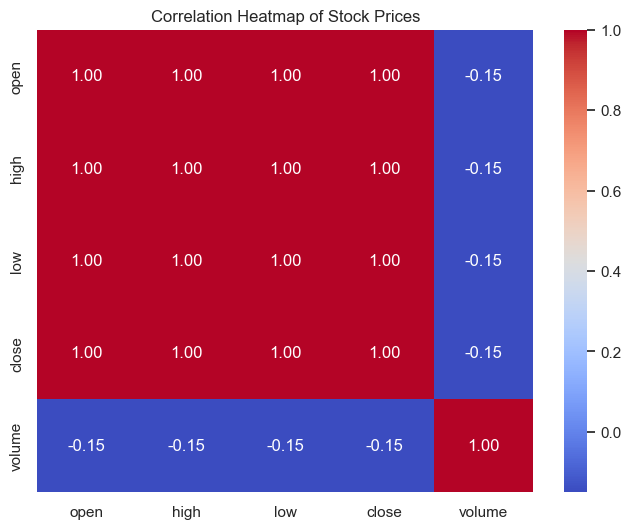

In [56]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Stock Prices")
plt.show()

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import os

os.makedirs("images", exist_ok=True)

In [58]:
numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8,5))
    plt.hist(df[col].dropna(), bins=30)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.savefig(f"images/{col}_histogram.png")
    plt.close()

In [59]:
for col in numeric_cols:
    plt.figure(figsize=(8,3))
    plt.boxplot(df[col].dropna(), vert=False)
    plt.title(f"Boxplot of {col}")
    plt.xlabel(col)
    plt.savefig(f"images/{col}_boxplot.png")
    plt.close()

In [60]:
base_col = "open"

for col in ["high", "low", "close", "volume"]:
    plt.figure(figsize=(6,5))
    plt.scatter(df[base_col], df[col])
    plt.xlabel(base_col)
    plt.ylabel(col)
    plt.title(f"{base_col.capitalize()} vs {col.capitalize()}")
    plt.savefig(f"images/{base_col}_vs_{col}_scatter.png")
    plt.close()

In [61]:
corr = df.corr(numeric_only=True)

plt.figure(figsize=(7,6))
plt.imshow(corr)
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=45)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.title("Correlation Heatmap")
plt.savefig("images/correlation_heatmap.png")
plt.close()

In [62]:
plt.figure()
sns.histplot(df[col], kde=True)
plt.title(f"Distribution of {col}")
plt.savefig(f"images/{col}_histogram.png")
plt.close()

In [63]:
plt.figure()
sns.boxplot(x=df[col])
plt.title(f"Boxplot of {col}")
plt.savefig(f"images/{col}_boxplot.png")
plt.close()

In [64]:
plt.figure()
plt.scatter(df["open"], df[col])
plt.title(f"Open vs {col}")
plt.xlabel("open")
plt.ylabel(col)
plt.savefig(f"images/open_vs_{col}_scatter.png")
plt.close()

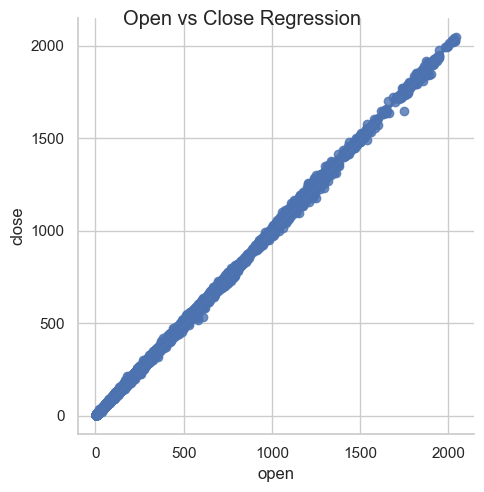

In [65]:
plot = sns.lmplot(x="open", y="close", data=df)
plot.fig.suptitle("Open vs Close Regression")
plot.savefig("images/open_vs_close_regression.png")

In [66]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.savefig("images/correlation_heatmap.png")
plt.close()

In [67]:
summary_stats = df.describe()
summary_stats.to_csv("images/summary_statistics.csv")